In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import os

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "MIMIC_CXR_EMB")))

In [3]:
from MIMIC_CXR_EMB.config_MIMIC import get_diseases, get_diseases_abbr

In [4]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [5]:
number_of_runs=5
significance_level=1.96 # for 95% ci
height = 6
font_size=11
rotation_degree =15

In [6]:
seed_19_sex = pd.read_csv("./FNR_GAPS/Run_seed19_FNR_GAP_sex.csv",index_col=0)
seed_31_sex = pd.read_csv("./FNR_GAPS/Run_seed31_FNR_GAP_sex.csv",index_col=0)
seed_38_sex = pd.read_csv("./FNR_GAPS/Run_seed38_FNR_GAP_sex.csv",index_col=0)
seed_47_sex = pd.read_csv("./FNR_GAPS/Run_seed47_FNR_GAP_sex.csv",index_col=0)
seed_77_sex = pd.read_csv("./FNR_GAPS/Run_seed77_FNR_GAP_sex.csv",index_col=0)
seed_77_sex.head(5)

,#M,FNR_M,Gap_M,#F,FNR_F,Gap_F
diseases,,,,,,
Enlarged Cardiomediastinum,7800,0.129,-0.024971,5406,0.154,0.024971
Cardiomegaly,8836,0.214,-0.034189,6121,0.249,0.034189
Lung Opacity,10549,0.209,-0.026680,7431,0.235,0.026680
Lung Lesion,1935,0.470,-0.053898,1406,0.524,0.053898
Edema,6357,0.214,-0.021494,4540,0.236,0.021494


In [7]:
seed_19_age = pd.read_csv("./FNR_GAPS/Run_seed19_FNR_GAP_Age.csv",index_col=0)
seed_31_age = pd.read_csv("./FNR_GAPS/Run_seed31_FNR_GAP_Age.csv",index_col=0)
seed_38_age = pd.read_csv("./FNR_GAPS/Run_seed38_FNR_GAP_Age.csv",index_col=0)
seed_47_age = pd.read_csv("./FNR_GAPS/Run_seed47_FNR_GAP_Age.csv",index_col=0)
seed_77_age = pd.read_csv("./FNR_GAPS/Run_seed77_FNR_GAP_Age.csv",index_col=0)
seed_77_age.head(5)

,#60-80,FNR_60-80,Gap_60-80,#40-60,FNR_40-60,Gap_40-60,#20-40,FNR_20-40,Gap_20-40,#80-,FNR_80-,Gap_80-,#0-20,FNR_0-20,Gap_0-20
diseases,,,,,,,,,,,,,,,
Enlarged Cardiomediastinum,5131,0.082,-0.018211,3441,0.100,0.000000,1194,0.119,0.018666,2600,0.064,-0.036415,79,0.127,0.026321
Cardiomegaly,4359,0.074,-0.014136,2857,0.095,0.006619,938,0.110,0.021573,2294,0.061,-0.026771,68,0.088,0.000000
Lung Opacity,5407,0.053,-0.024984,3694,0.078,0.000000,1353,0.092,0.014694,2535,0.048,-0.029567,87,0.080,0.002766
Lung Lesion,1104,0.361,-0.039869,780,0.401,0.000000,429,0.368,-0.032984,371,0.423,0.021899,23,0.478,0.076979
Edema,3378,0.128,-0.025760,2166,0.154,0.000389,776,0.153,0.000000,1740,0.121,-0.032086,51,0.196,0.042728


In [8]:
seed_19_race = pd.read_csv("./FNR_GAPS/Run_seed19_FNR_GAP_race.csv",index_col=0)
seed_31_race = pd.read_csv("./FNR_GAPS/Run_seed31_FNR_GAP_race.csv",index_col=0)
seed_38_race = pd.read_csv("./FNR_GAPS/Run_seed38_FNR_GAP_race.csv",index_col=0)
seed_47_race = pd.read_csv("./FNR_GAPS/Run_seed47_FNR_GAP_race.csv",index_col=0)
seed_77_race = pd.read_csv("./FNR_GAPS/Run_seed77_FNR_GAP_race.csv",index_col=0)
seed_77_race.head(3)

,#White,FNR_White,Gap_White,#Black,FNR_Black,Gap_Black,#Hisp,FNR_Hisp,Gap_Hisp,#Other,FNR_Other,Gap_Other,#Asian,FNR_Asian,Gap_Asian,#American,FNR_American,Gap_American
diseases,,,,,,,,,,,,,,,,,,
Enlarged Cardiomediastinum,8618,0.144,-0.024996,894,0.210,0.041410,392,0.194,0.024996,1733,0.101,-0.067900,1381,0.093,-0.076195,188,0.202,0.033246
Cardiomegaly,9772,0.234,0.008191,1450,0.330,0.104322,592,0.360,0.134464,1653,0.142,-0.083168,1315,0.130,-0.095296,175,0.217,-0.008191
Lung Opacity,11959,0.226,-0.003401,1581,0.365,0.136037,600,0.338,0.109411,2025,0.124,-0.104477,1617,0.107,-0.121934,198,0.232,0.003401


In [9]:
diseases=get_diseases()

diseases = [disease for disease in diseases if disease != 'No Finding']

diseases_abbr =get_diseases_abbr()


## 1. Gender

In [10]:
sex_dataframes = [seed_19_sex, seed_31_sex, seed_38_sex, seed_47_sex, seed_77_sex]
result_sex = pd.concat(sex_dataframes)

In [11]:
result_sex_grouped =result_sex.groupby("diseases")
result_sex_grouped_Stat = result_sex_grouped.describe()

In [12]:
result_sex_grouped_Stat

#M                                           \
                           count     mean  std      min      25%      50%   
diseases                                                                    
Atelectasis                  5.0   9050.0  0.0   9050.0   9050.0   9050.0   
Cardiomegaly                 5.0   8836.0  0.0   8836.0   8836.0   8836.0   
Consolidation                5.0   6001.0  0.0   6001.0   6001.0   6001.0   
Edema                        5.0   6357.0  0.0   6357.0   6357.0   6357.0   
Enlarged Cardiomediastinum   5.0   7800.0  0.0   7800.0   7800.0   7800.0   
Fracture                     5.0   3400.0  0.0   3400.0   3400.0   3400.0   
Lung Lesion                  5.0   1935.0  0.0   1935.0   1935.0   1935.0   
Lung Opacity                 5.0  10549.0  0.0  10549.0  10549.0  10549.0   
No Finding                   5.0   5335.0  0.0   5335.0   5335.0   5335.0   
Pleural Effusion             5.0   8393.0  0.0   8393.0   8393.0   8393.0   
Pleural Other                5.0   1518.0  0.0   1518.0   1518.0   1518.0   
Pneumonia                    5.0   3664.0  0.0   3664.0   3664.0   3664.0   
Pneumothorax                 5.0   1823.0  0.0   1823.0   1823.0   1823.0   
Support Devices              5.0  10920.0  0.0  10920.0  10920.0  10920.0   

                                             FNR_M          ...  FNR_F         \
                                75%      max count    mean  ...    75%    max   
diseases                                                    ...                 
Atelectasis                  9050.0   9050.0   5.0  0.1976  ...  0.240  0.243   
Cardiomegaly                 8836.0   8836.0   5.0  0.2084  ...  0.249  0.254   
Consolidation                6001.0   6001.0   5.0  0.2164  ...  0.216  0.217   
Edema                        6357.0   6357.0   5.0  0.2208  ...  0.252  0.257   
Enlarged Cardiomediastinum   7800.0   7800.0   5.0  0.1326  ...  0.161  0.164   
Fracture                     3400.0   3400.0   5.0  0.3078  ...  0.314  0.333   
Lung Lesion                  1935.0   1935.0   5.0  0.4700  ...  0.540  0.541   
Lung Opacity                10549.0  10549.0   5.0  0.2066  ...  0.236  0.242   
No Finding                   5335.0   5335.0   5.0  0.2480  ...  0.200  0.215   
Pleural Effusion             8393.0   8393.0   5.0  0.1686  ...  0.192  0.195   
Pleural Other                1518.0   1518.0   5.0  0.4190  ...  0.451  0.462   
Pneumonia                    3664.0   3664.0   5.0  0.4558  ...  0.457  0.458   
Pneumothorax                 1823.0   1823.0   5.0  0.4806  ...  0.470  0.519   
Support Devices             10920.0  10920.0   5.0  0.0836  ...  0.098  0.100   

                           Gap_F                                          \
                           count      mean       std       min       25%   
diseases                                                                   
Atelectasis                  5.0  0.035826  0.003034  0.031163  0.034422   
Cardiomegaly                 5.0  0.028298  0.004323  0.023207  0.024993   
Consolidation                5.0 -0.011718  0.004509 -0.015570 -0.013456   
Edema                        5.0  0.020129  0.002275  0.016837  0.019514   
Enlarged Cardiomediastinum   5.0  0.023994  0.003809  0.018401  0.023753   
Fracture                     5.0  0.003712  0.004923 -0.003493  0.002277   
Lung Lesion                  5.0  0.057298  0.005610  0.049584  0.053898   
Lung Opacity                 5.0  0.028120  0.003813  0.024402  0.025990   
No Finding                   5.0 -0.048012  0.003117 -0.052484 -0.048807   
Pleural Effusion             5.0  0.010496  0.007568  0.002204  0.002712   
Pleural Other                5.0  0.022106  0.009621  0.006725  0.019337   
Pneumonia                    5.0 -0.010939  0.008993 -0.021776 -0.015852   
Pneumothorax                 5.0 -0.014180  0.005810 -0.017748 -0.017496   
Support Devices              5.0  0.012313  0.002330  0.009458  0.010795   

                                                 

In [13]:
sex_df_male_mean = result_sex_grouped_Stat['#M']['mean']

sex_df_male_gap = result_sex_grouped_Stat['Gap_M']["mean"]
sex_df_male_ci = significance_level * result_sex_grouped_Stat['Gap_M']["std"] / np.sqrt(number_of_runs)

sex_df_female_mean = result_sex_grouped_Stat['#F']['mean']
sex_df_female_gap = result_sex_grouped_Stat['Gap_F']["mean"]
sex_df_female_ci = significance_level * result_sex_grouped_Stat['Gap_F']["std"] / np.sqrt(number_of_runs)


In [14]:
#Want = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))
percent_male_list = []
ci_male_list = []
gap_male_mean_list = []

diseases_abbr_list = []
distance_list = []

percent_female_list = []
ci_female_list = []
percent_female_list = []
gap_femal_mean_list = []

In [15]:
for disease in diseases:
  
  percent_male_list.append(sex_df_male_mean[disease])
  gap_male_mean_list.append(sex_df_male_gap[disease])
  ci_male_list.append(sex_df_male_ci[disease])

  percent_female_list.append(sex_df_female_mean[disease])
  gap_femal_mean_list.append(sex_df_female_gap[disease])
  ci_female_list.append(sex_df_female_ci[disease])

  distance_list.append(np.absolute(sex_df_female_gap[disease] - sex_df_male_gap[disease]))
  diseases_abbr_list.append(diseases_abbr[disease])

d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "#M": percent_male_list, 'Gap_M_mean': gap_male_mean_list, 'CI_M': ci_male_list,
     "#F": percent_female_list, 'Gap_F_mean': gap_femal_mean_list, 'CI_F': ci_female_list
     }

sex_tpr_disp_df = pd.DataFrame(d)
sex_tpr_disp_df = sex_tpr_disp_df.sort_values(by ='Distance' )

In [16]:
sex_tpr_disp_df

,diseases,diseases_abbr,Distance,#M,Gap_M_mean,CI_M,#F,Gap_F_mean,CI_F
11,Fracture,Fracture,0.007424,3400.0,-0.003712,0.004315,2462.0,0.003712,0.004315
9,Pleural Effusion,Effusion,0.020991,8393.0,-0.010496,0.006633,5881.0,0.010496,0.006633
6,Pneumonia,Pneumonia,0.021878,3664.0,0.010939,0.007882,2518.0,-0.010939,0.007882
5,Consolidation,Consolidation,0.023437,6001.0,0.011718,0.003952,4156.0,-0.011718,0.003952
12,Support Devices,Sup. Devices,0.024627,10920.0,-0.012313,0.002043,7219.0,0.012313,0.002043
8,Pneumothorax,Pneumothorax,0.028360,1823.0,0.014180,0.005093,1267.0,-0.014180,0.005093
4,Edema,Edema,0.040258,6357.0,-0.020129,0.001994,4540.0,0.020129,0.001994
10,Pleural Other,Pleural Other,0.044211,1518.0,-0.022106,0.008433,1076.0,0.022106,0.008433
0,Enlarged Cardiomediastinum,Enlarged Card.,0.047988,7800.0,-0.023994,0.003338,5406.0,0.023994,0.003338
2,Lung Opacity,Air. Opacity,0.056240,10549.0,-0.028120,0.003342,7431.0,0.028120,0.003342


In [17]:
sex_tpr_disp_df.to_csv("./FNR_GAPS/sex_fnr_disp.csv",index=False)

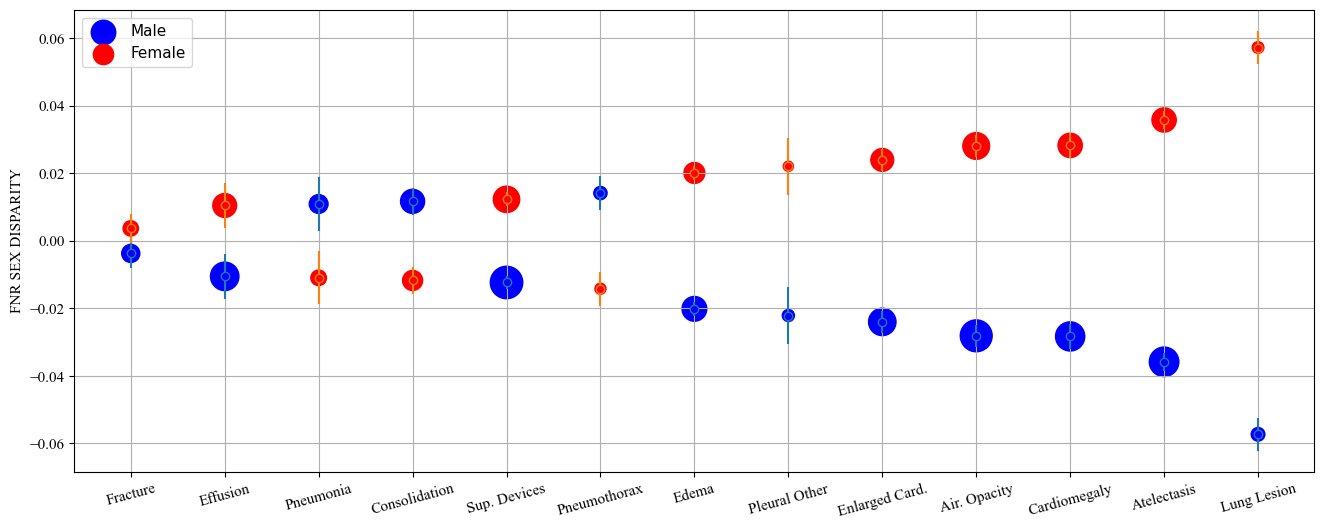

In [18]:

plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
            s= np.multiply(sex_tpr_disp_df['#M'],0.05), marker='o',color='blue', label="Male")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
             yerr = sex_tpr_disp_df['CI_M'],fmt='o',mfc='blue')
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
            s= np.multiply(sex_tpr_disp_df['#F'],0.05), marker='o',color='red', label="Female")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
             yerr = sex_tpr_disp_df['CI_F'],fmt='o',mfc='red')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.ylabel("FNR SEX DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./FNR_GAPS/FNR_Dis_SEX.pdf")


## 2. Age

In [19]:
age_dataframes = [seed_19_age, seed_31_age, seed_38_age, seed_47_age, seed_77_age]
result_age_df= pd.concat(age_dataframes)

result_age_grouped =result_age_df.groupby("diseases")
result_age_grouped_stat = result_age_grouped.describe()


In [20]:
age_df_40_mean = result_age_grouped_stat['#40-60']['mean']
age_df_40_gap = result_age_grouped_stat['Gap_40-60']["mean"]
age_df_40_ci = significance_level*result_age_grouped_stat['Gap_40-60']["std"]/np.sqrt(number_of_runs)

In [21]:
age_df_60_mean = result_age_grouped_stat['#60-80']['mean']
age_df_60_gap = result_age_grouped_stat['Gap_60-80']["mean"]
age_df_60_ci = significance_level*result_age_grouped_stat['Gap_60-80']["std"]/np.sqrt(number_of_runs)

In [22]:
age_df_20_mean = result_age_grouped_stat['#20-40']['mean']
age_df_20_gap = result_age_grouped_stat['Gap_20-40']["mean"]
age_df_20_ci = significance_level*result_age_grouped_stat['Gap_20-40']["std"]/np.sqrt(number_of_runs)

In [23]:
age_df_80_mean = result_age_grouped_stat['#80-']['mean']
age_df_80_gap = result_age_grouped_stat['Gap_80-']["mean"]
age_df_80_ci = significance_level*result_age_grouped_stat['Gap_80-']["std"]/np.sqrt(number_of_runs)

In [24]:
age_df_0_mean = result_age_grouped_stat['#0-20']['mean']
age_df_0_gap = result_age_grouped_stat['Gap_0-20']["mean"]
age_df_0_ci = significance_level*result_age_grouped_stat['Gap_0-20']["std"]/np.sqrt(number_of_runs)

In [25]:
age_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [26]:
prcent_40_list = []
ci_40_list = []
gap_40_mean_list = []
diseases_abbr_list = []
distance_list = []

prcent_60_list = []
ci_60_list = []
prcent_60_list = []
gap_60_mean_list = []

prcent_20_list = []
ci_20_list = []
prcent_20_list = []
gap_20_mean_list = []

prcent_80_list = []
ci_80_list = []
prcent_80_list = []
gap_80_mean_list = []

prcent_0_list = []
ci_0_list = []
prcent_0_list = []
gap_0_mean_list = []
mean_list = []


In [27]:
for disease in diseases:
    mean_list = []
    cleaned_mean_gap_list = []
    prcent_40_list.append(age_df_40_mean[disease])
    gap_40_mean_list.append(age_df_40_gap[disease])
    ci_40_list.append(age_df_40_ci[disease])
    mean_list.append(age_df_40_gap[disease])

    prcent_60_list.append(age_df_60_mean[disease])
    gap_60_mean_list.append(age_df_60_gap[disease])
    ci_60_list.append(age_df_60_ci[disease])
    mean_list.append(age_df_60_gap[disease])

    prcent_20_list.append(age_df_20_mean[disease])
    gap_20_mean_list.append(age_df_20_gap[disease])
    ci_20_list.append(age_df_20_ci[disease])
    mean_list.append(age_df_20_gap[disease])

    prcent_80_list.append(age_df_80_mean[disease])
    gap_80_mean_list.append(age_df_80_gap[disease])
    ci_80_list.append(age_df_80_ci[disease])
    mean_list.append(age_df_80_gap[disease])

    prcent_0_list.append(age_df_0_mean[disease])
    gap_0_mean_list.append(age_df_0_gap[disease])
    ci_0_list.append(age_df_0_ci[disease])
    mean_list.append(age_df_0_gap[disease])


    cleaned_mean_gap_list = [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_gap_list) - np.min(cleaned_mean_gap_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [28]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "#40-60": prcent_40_list, 'Gap_40-60_mean': gap_40_mean_list, 'CI_40-60': ci_40_list,
     "#60-80": prcent_60_list, 'Gap_60-80_mean': gap_60_mean_list, 'CI_60-80': ci_60_list,
     "#20-40": prcent_20_list, 'Gap_20-40_mean': gap_20_mean_list, 'CI_20-40': ci_20_list,
     "#80-": prcent_80_list, 'Gap_80-_mean': gap_80_mean_list, 'CI_80-': ci_80_list,
     "#0-20": prcent_0_list, 'Gap_0-20_mean': gap_0_mean_list, 'CI_0-20': ci_0_list
     }
age_tpr_disp_df = pd.DataFrame(d)

In [29]:
age_tpr_disp_df = age_tpr_disp_df.sort_values(by ='Distance' )
age_tpr_disp_df.to_csv("./FNR_GAPS/age_tpr_disp.csv",index=False)

In [30]:
plt.rcParams.update({'font.size': font_size})

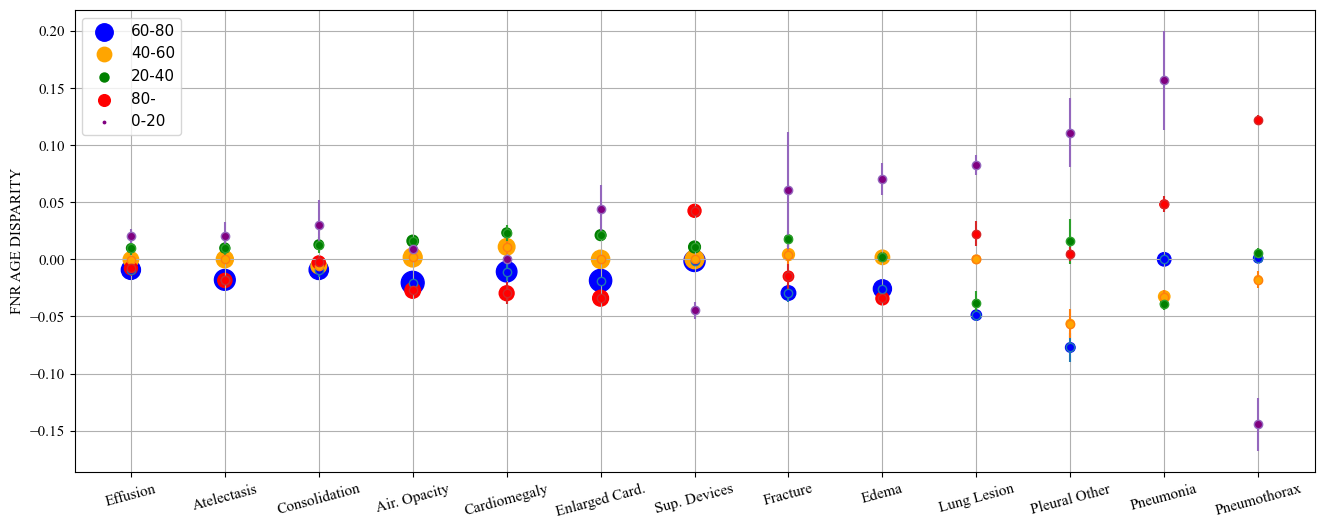

In [31]:
plt.figure(figsize=(16,height))
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
            s= np.multiply(age_tpr_disp_df['#60-80'],0.05), marker='o',color='blue', label="60-80")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
             yerr = age_tpr_disp_df['CI_60-80'],fmt='o',mfc='blue')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
            s= np.multiply(age_tpr_disp_df['#40-60'],0.05), marker='o',color='orange', label="40-60")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
             yerr = age_tpr_disp_df['CI_40-60'],fmt='o',mfc='orange')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
            s= np.multiply(age_tpr_disp_df['#20-40'],0.05), marker='o',color='green', label="20-40")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
             yerr = age_tpr_disp_df['CI_20-40'],fmt='o',mfc='green')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
            s= np.multiply(age_tpr_disp_df['#80-'],0.05), marker='o',color='red', label="80-")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
             yerr = age_tpr_disp_df['CI_80-'],fmt='o',mfc='red')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
            s= np.multiply(age_tpr_disp_df['#0-20'],0.05), marker='o',color='purple', label="0-20")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
             yerr = age_tpr_disp_df['CI_0-20'],fmt='o',mfc='purple')


plt.xticks(rotation = rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("FNR AGE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./FNR_GAPS/TPR_Dis_AGE.pdf")

## 3. Race

In [32]:
race_dataframes = [seed_19_race, seed_31_race, seed_38_race, seed_47_race, seed_77_race]
result_race_df= pd.concat(race_dataframes)

result_race_grouped =result_race_df.groupby("diseases")
result_race_grouped_stat = result_race_grouped.describe()

In [33]:
result_race_grouped_stat

#White                                           \
                            count     mean  std      min      25%      50%   
diseases                                                                     
Atelectasis                   5.0  10276.0  0.0  10276.0  10276.0  10276.0   
Cardiomegaly                  5.0   9772.0  0.0   9772.0   9772.0   9772.0   
Consolidation                 5.0   6772.0  0.0   6772.0   6772.0   6772.0   
Edema                         5.0   7224.0  0.0   7224.0   7224.0   7224.0   
Enlarged Cardiomediastinum    5.0   8618.0  0.0   8618.0   8618.0   8618.0   
Fracture                      5.0   3872.0  0.0   3872.0   3872.0   3872.0   
Lung Lesion                   5.0   2194.0  0.0   2194.0   2194.0   2194.0   
Lung Opacity                  5.0  11959.0  0.0  11959.0  11959.0  11959.0   
No Finding                    5.0   6117.0  0.0   6117.0   6117.0   6117.0   
Pleural Effusion              5.0   9826.0  0.0   9826.0   9826.0   9826.0   
Pleural Other                 5.0   1608.0  0.0   1608.0   1608.0   1608.0   
Pneumonia                     5.0   4068.0  0.0   4068.0   4068.0   4068.0   
Pneumothorax                  5.0   2252.0  0.0   2252.0   2252.0   2252.0   
Support Devices               5.0  12324.0  0.0  12324.0  12324.0  12324.0   

                                             FNR_White          ...  \
                                75%      max     count    mean  ...   
diseases                                                        ...   
Atelectasis                 10276.0  10276.0       5.0  0.2090  ...   
Cardiomegaly                 9772.0   9772.0       5.0  0.2244  ...   
Consolidation                6772.0   6772.0       5.0  0.2128  ...   
Edema                        7224.0   7224.0       5.0  0.2284  ...   
Enlarged Cardiomediastinum   8618.0   8618.0       5.0  0.1466  ...   
Fracture                     3872.0   3872.0       5.0  0.3202  ...   
Lung Lesion                  2194.0   2194.0       5.0  0.5068  ...   
Lung Opacity                11959.0  11959.0       5.0  0.2248  ...   
No Finding                   6117.0   6117.0       5.0  0.2522  ...   
Pleural Effusion             9826.0   9826.0       5.0  0.1672  ...   
Pleural Other                1608.0   1608.0       5.0  0.4402  ...   
Pneumonia                    4068.0   4068.0       5.0  0.4784  ...   
Pneumothorax                 2252.0   2252.0       5.0  0.4704  ...   
Support Devices             12324.0  12324.0       5.0  0.0884  ...   

                           FNR_American        Gap_American            \
                                    75%    max        count      mean   
diseases                                                                
Atelectasis                       0.222  0.241          5.0  0.007242   
Cardiomegaly                      0.223  0.240          5.0 -0.006330   
Consolidation                     0.267  0.286          5.0  0.018581   
Edema                             0.277  0.285          5.0  0.030855   
Enlarged Cardiomediastinum        0.213  0.218          5.0  0.036411   
Fracture                          0.408  0.421          5.0  0.033471   
Lung Lesion                       0.366  0.366          5.0 -0.119500   
Lung Opacity                      0.242  0.242          5.0  0.005368   
No Finding                        0.305  0.305          5.0  0.097413   
Pleural Effusion                  0.237  0.263          5.0  0.032434   
Pleural Other                     0.463  0.512          5.0 -0.025172   
Pneumonia                         0.425  0.425          5.0 -0.036493   
Pneumothorax                      0.412  0.412          5.0 -0.115650   
Support Devices                   0.070  0.075          5.0 -0.014950   

                                                                              \
                                 std       min       25%       50%       75%   
diseases                                                                       
Atelectasi

In [34]:
race_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [35]:
race_df_white_mean = result_race_grouped_stat['#White']['mean']
race_df_white_gap = result_race_grouped_stat['Gap_White']["mean"]
race_df_white_ci= significance_level * result_race_grouped_stat['Gap_White']["std"] / np.sqrt(number_of_runs)

In [36]:
race_df_black_mean = result_race_grouped_stat['#Black']['mean']
race_df_black_gap = result_race_grouped_stat['Gap_Black']["mean"]
race_df_black_ci= significance_level * result_race_grouped_stat['Gap_Black']["std"] / np.sqrt(number_of_runs)

In [37]:
race_df_hisp_mean = result_race_grouped_stat['#Hisp']['mean']
race_df_hisp_gap = result_race_grouped_stat['Gap_Hisp']["mean"]
race_df_hisp_ci= significance_level * result_race_grouped_stat['Gap_Hisp']["std"] / np.sqrt(number_of_runs)


In [38]:
race_df_other_mean = result_race_grouped_stat['#Other']['mean']
race_df_other_gap = result_race_grouped_stat['Gap_Other']["mean"]
race_df_other_ci= significance_level * result_race_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [39]:
race_df_asian_mean = result_race_grouped_stat['#Asian']['mean']
race_df_asian_gap = result_race_grouped_stat['Gap_Asian']["mean"]
race_df_asian_ci= significance_level * result_race_grouped_stat['Gap_Asian']["std"] / np.sqrt(number_of_runs)

In [40]:
race_df_american_mean = result_race_grouped_stat['#American']['mean']
race_df_american_gap = result_race_grouped_stat['Gap_American']["mean"]
race_df_american_ci= significance_level * result_race_grouped_stat['Gap_American']["std"] / np.sqrt(number_of_runs)


In [41]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []


ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


In [42]:
for disease in diseases:
    mean_list = []
    percent_black_list.append(race_df_black_mean[disease])
    gap_black_mean_list.append(race_df_black_gap[disease])
    ci_black_list.append(race_df_black_ci[disease])
    mean_list.append(race_df_black_gap[disease])

    percent_hisp_list.append(race_df_hisp_mean[disease])
    gap_hisp_mean_list.append(race_df_hisp_gap[disease])
    ci_hisp_list.append(race_df_hisp_ci[disease])
    mean_list.append(race_df_hisp_gap[disease])

    percent_other_list.append(race_df_other_mean[disease])
    gap_other_mean_list.append(race_df_other_gap[disease])
    ci_other_list.append(race_df_other_ci[disease])
    mean_list.append(race_df_other_gap[disease])

    percent_white_list.append(race_df_white_mean[disease])
    gap_white_mean_list.append(race_df_white_gap[disease])
    ci_white_list.append(race_df_white_ci[disease])
    mean_list.append(race_df_white_gap[disease])

    percent_asian_list.append(race_df_asian_mean[disease])
    gap_asian_mean_list.append(race_df_asian_gap[disease])
    ci_asian_list.append(race_df_asian_ci[disease])
    mean_list.append(race_df_asian_gap[disease])

    percent_american_list.append(race_df_american_mean[disease])
    gap_american_mean_list.append(race_df_american_gap[disease])
    ci_american_list.append(race_df_american_ci[disease])
    mean_list.append(race_df_american_gap[disease])

    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']

    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))

    diseases_abbr_list.append(diseases_abbr[disease])

In [43]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "#White": percent_white_list, 'Gap_W_mean': gap_white_mean_list, 'CI_W': ci_white_list,
     "#Black": percent_white_list, 'Gap_B_mean': gap_black_mean_list, 'CI_B': ci_black_list,
     "#Hisp": percent_hisp_list, 'Gap_H_mean': gap_hisp_mean_list, 'CI_H': ci_hisp_list,
     "#Other": percent_other_list, 'Gap_Ot_mean': gap_other_mean_list, 'CI_Ot': ci_other_list,
     "#Asian": percent_asian_list, 'Gap_As_mean': gap_asian_mean_list, 'CI_As': ci_asian_list,
     "#American": percent_american_list, 'Gap_Am_mean': gap_american_mean_list, 'CI_Am': ci_american_list
     }
race_tpr_disp_df = pd.DataFrame(d)
race_tpr_disp_df = race_tpr_disp_df.sort_values(by ='Distance')
race_tpr_disp_df.to_csv("./FNR_GAPS/race_tpr_disp.csv",index=False)

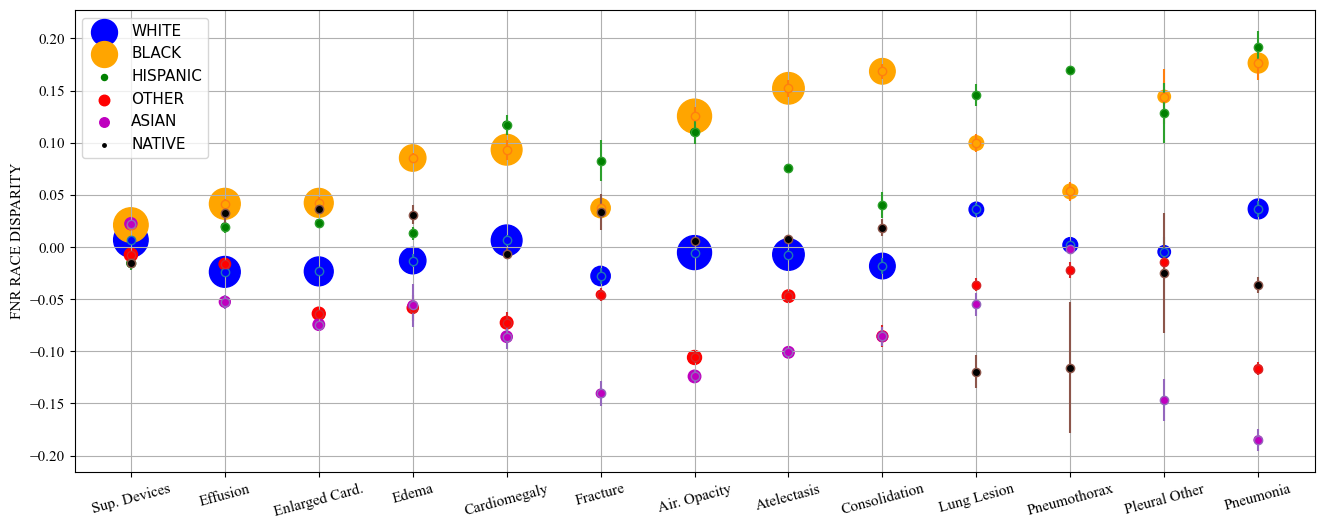

In [44]:
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
            s= np.multiply(race_tpr_disp_df['#White'],0.05), marker='o',color='blue', label="WHITE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
             yerr = race_tpr_disp_df['CI_W'],fmt='o',mfc='blue')#ecolor='blue'

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
            s= np.multiply(race_tpr_disp_df['#Black'],0.05), marker='o',color='orange', label="BLACK")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
             yerr = race_tpr_disp_df['CI_B'],fmt='o',mfc='orange')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
            s= np.multiply(race_tpr_disp_df['#Hisp'],0.05), marker='o',color='green', label="HISPANIC")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
             yerr = race_tpr_disp_df['CI_H'],fmt='o',mfc='green')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
            s= np.multiply(race_tpr_disp_df['#Other'],0.05), marker='o',color='r', label="OTHER")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
             yerr = race_tpr_disp_df['CI_Ot'],fmt='o',mfc='r')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean'],
            s= np.multiply(race_tpr_disp_df['#Asian'],0.05), marker='o',color='m', label="ASIAN")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean']
             ,yerr = race_tpr_disp_df['CI_As'],fmt='o',mfc='m')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
            s= np.multiply(race_tpr_disp_df['#American'],0.05), marker='o',color='k', label="NATIVE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
             yerr = race_tpr_disp_df['CI_Am'],fmt='o',mfc='k')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("FNR RACE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig("./FNR_GAPS/TPR_Dis_RACE.pdf")